<a href="https://colab.research.google.com/github/mateuszrajca69/r/blob/main/dobraSCIEZKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import math  as m
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl

# działania na łańcuchach znaków
import string 

# statystyka
import statistics as st

# pomar czasu
import time

# dopasowywanie krzywych do danych
from scipy.optimize import curve_fit

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [4]:
def trian():
    x1=random.random()
    x2=random.random()
    if (1.2-x1-x2>0) and (-0.2+x1>0) and (-0.2+x2)>0:
        c=1
    else:
        c=0
    return np.array([x1,x2,c])

In [5]:
probka_k=np.array([trian() for i in range(6000)])
print(probka_k.shape)

(6000, 3)


In [7]:
def draw_result(X,y): 
  fig=plt.figure(figsize=(5,5))

  # dorysowanie okręgu
  #ax=fig.add_subplot(1,1,1)
  #circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
  #ax.add_patch(circ)

  plt.title("Działanie na próbce testowej",fontsize=16) 
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,1]),max(X[:,1]))
  plt.scatter(X[:,0],X[:,1],c=y,
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=min(y), vmax=max(y)))

  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18);

Shapes of datasets X_train, X_test, y_train, y_test:  (3000, 2) (3000, 2) (3000,) (3000,)


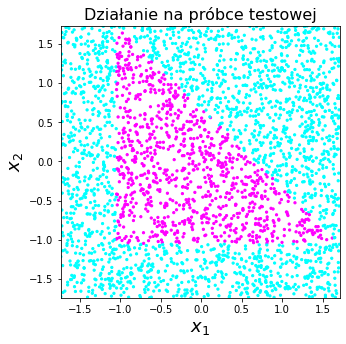

In [9]:
X, y = probka_k[:,:2], probka_k[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

print("Shapes of datasets X_train, X_test, y_train, y_test: ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#narysuj dane testowe
draw_result(X_test, y_test)

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.01, early_stopping=True,validation_fraction=0.2,verbose=True,n_iter_no_change=100,max_iter=1000)

print(clf.fit(X_train,y_train))
score = clf.score(X_test,y_test)
print('score = {}'.format(score)) 
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.70648083
Validation score: 0.666667
Iteration 2, loss = 0.65453331
Validation score: 0.666667
Iteration 3, loss = 0.63956310
Validation score: 0.666667
Iteration 4, loss = 0.62712705
Validation score: 0.666667
Iteration 5, loss = 0.61407816
Validation score: 0.666667
Iteration 6, loss = 0.59411851
Validation score: 0.666667
Iteration 7, loss = 0.56474392
Validation score: 0.755000
Iteration 8, loss = 0.52170358
Validation score: 0.865000
Iteration 9, loss = 0.46567058
Validation score: 0.878333
Iteration 10, loss = 0.41041590
Validation score: 0.875000
Iteration 11, loss = 0.36241154
Validation score: 0.888333
Iteration 12, loss = 0.32468863
Validation score: 0.891667
Iteration 13, loss = 0.29902417
Validation score: 0.888333
Iteration 14, loss = 0.27858219
Validation score: 0.900000
Iteration 15, loss = 0.26339472
Validation score: 0.900000
Iteration 16, loss = 0.24983192
Validation score: 0.903333
Iteration 17, loss = 0.23759210
Validation score: 0.906667
Iterat

[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.755, 0.865, 0.8783333333333333, 0.875, 0.8883333333333333, 0.8916666666666667, 0.8883333333333333, 0.9, 0.9, 0.9033333333333333, 0.9066666666666666, 0.93, 0.9133333333333333, 0.9166666666666666, 0.9433333333333334, 0.94, 0.9416666666666667, 0.9616666666666667, 0.9483333333333334, 0.96, 0.9683333333333334, 0.9633333333333334, 0.975, 0.97, 0.9716666666666667, 0.9716666666666667, 0.9733333333333334, 0.9766666666666667, 0.975, 0.9666666666666667, 0.975, 0.9766666666666667, 0.9766666666666667, 0.9866666666666667, 0.9833333333333333, 0.9866666666666667, 0.9733333333333334, 0.9716666666666667, 0.985, 0.9833333333333333, 0.9866666666666667, 0.9766666666666667, 0.985, 0.9883333333333333, 0.9766666666666667, 0.985, 0.9883333333333333, 0.985, 0.9866666666666667, 0.9916666666666667, 0.9816666666666667, 0.9833333333333333, 0.9883333333333333, 0.99, 0.9866666666666667, 0.9883333

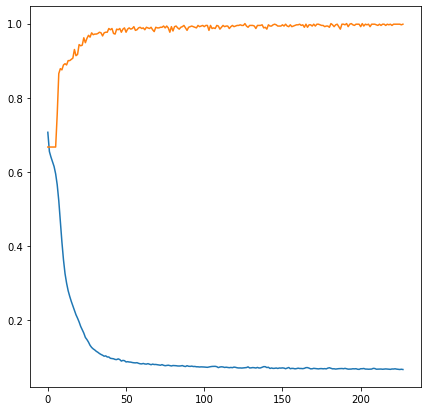

In [11]:

fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

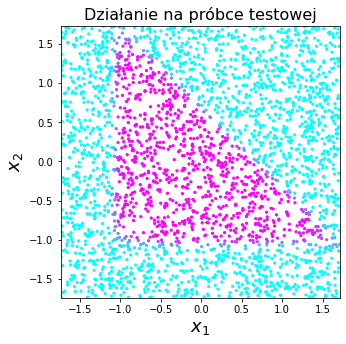

In [12]:
draw_result(X_test, Z)

<Figure size 504x504 with 0 Axes>

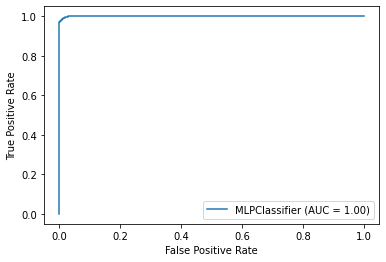

Area Under Curve AUC =  0.9996374761581689
Area Under Curve AUC =  0.9996374761581689


In [14]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score

fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))